# ICANS Spin Chain Example 

In [33]:
import os
import site
import numpy as np
site.addsitedir(os.environ['HOME'] + '/.local/lib/python3.6/site-packages')
%load_ext ipython_magic

The ipython_magic extension is already loaded. To reload it, use:
  %reload_ext ipython_magic


## Grab the compiled MATLAB process 

In [8]:
m = %getProcess

## Create the SpinW object

In [9]:
FMchain = m.spinw()

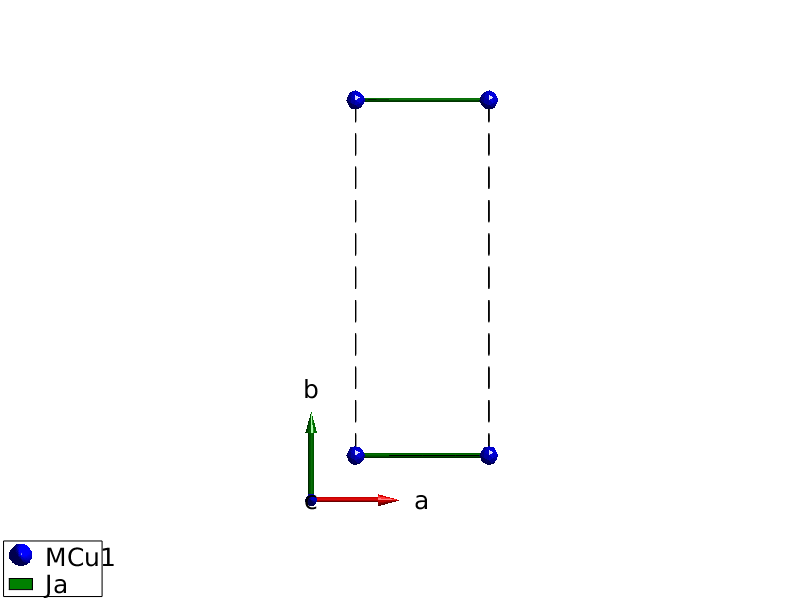

In [27]:
FMchain.genlattice('lat_const',[3, 8, 8],'angled',[90, 90, 90])
FMchain.addatom('r', [0, 0, 0],'S', 1.,'label','MCu1','color','blue')
FMchain.plot()
%showPlot

## Generate interactions and assign bonds

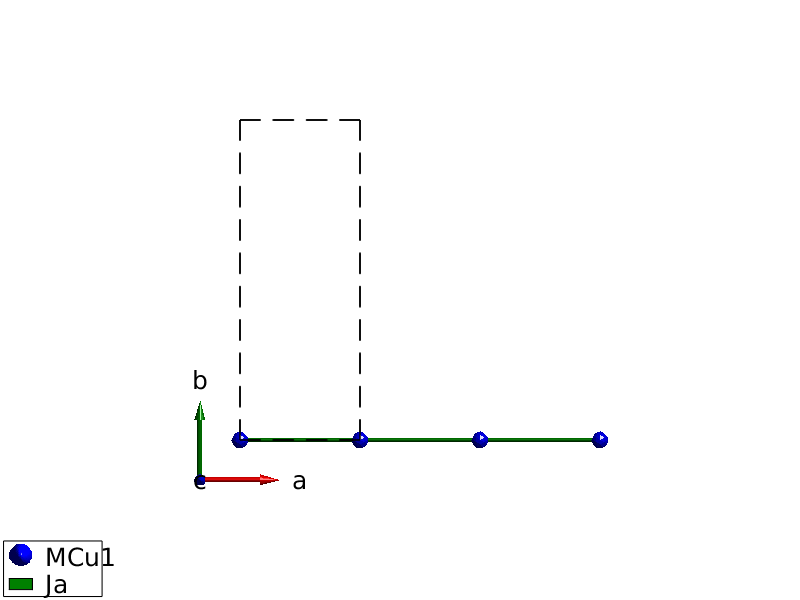

In [28]:
FMchain.gencoupling('maxDistance',7.)
FMchain.addmatrix('value', -1. ,'label', 'Ja', 'color', 'green')
FMchain.addcoupling('mat','Ja','bond',1.);
FMchain.plot('range',[3., 0.2, 0.2])
%showPlot

## Generate Magnetic Structure

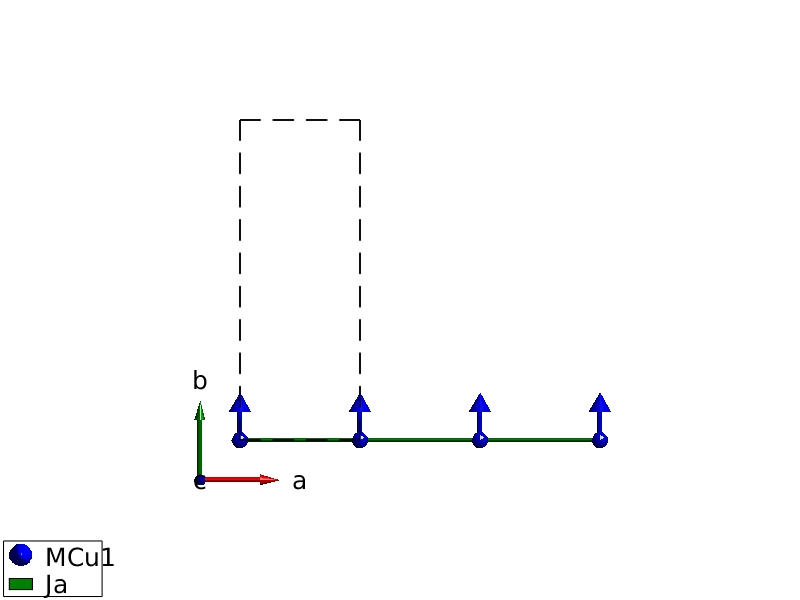

In [30]:
FMchain.genmagstr('mode','direct', 'k',[0, 0, 0],'n',[1, 0, 0],'S',[[0], [1], [0]]);
FMchain.plot('range',[3., 0.2, 0.2])
%showPlot

## Generate the spectra

None cannot be passed to MATLAB


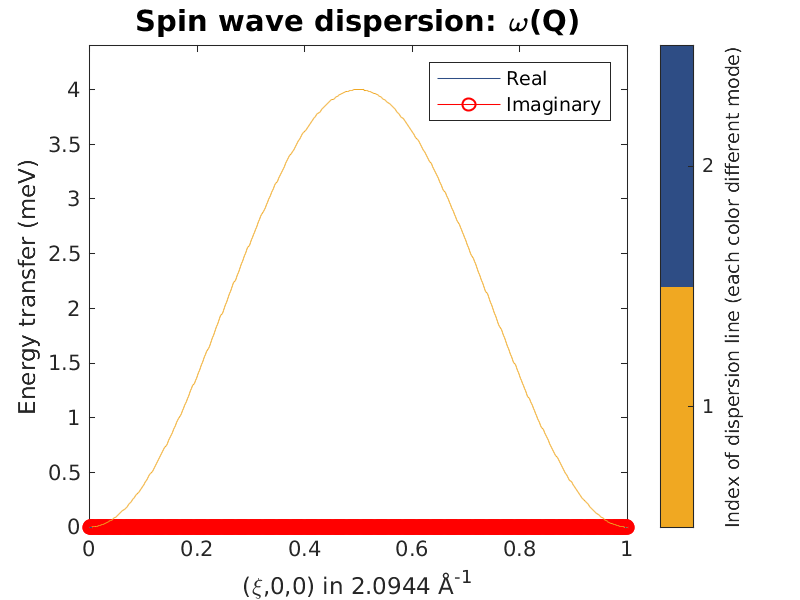

In [32]:
FMspec = FMchain.spinwave(([0, 0, 0], [1, 0, 0], 500));
m.sw_plotspec(FMspec, nargout=0)
%showPlot

## Generate the powder spectra

None cannot be passed to MATLAB
None cannot be passed to MATLAB
None cannot be passed to MATLAB


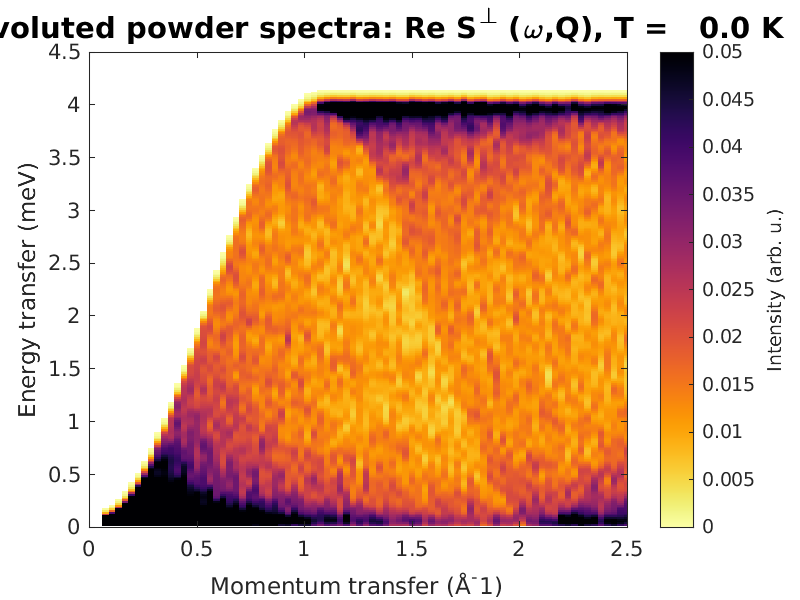

In [44]:
FMpow = FMchain.powspec(np.linspace(0,3,100), 'Evect', np.linspace(0,5,300),'nRand',1000.);
m.sw_plotspec(FMpow, 'dE', 0.1, nargout=0)
m.axis([0, 2.5, 0, 4.5], nargout=0);
m.caxis([0, .05], nargout=0);
%showPlot